ValueError: not enough values to unpack (expected 4, got 2)

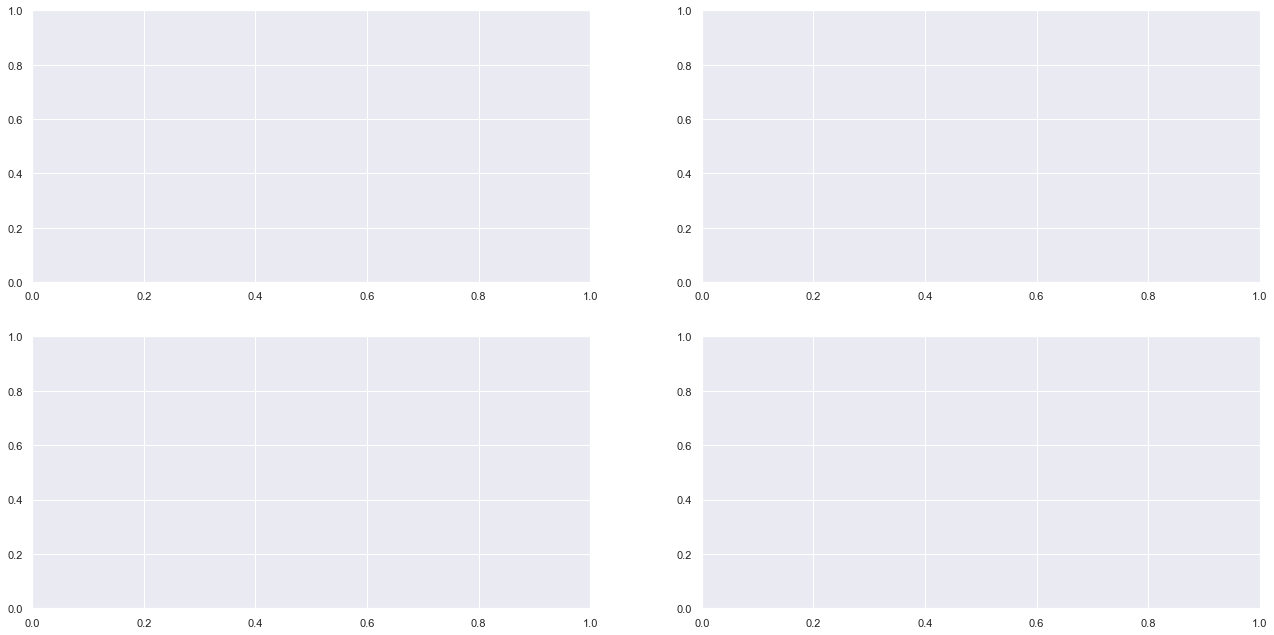

In [6]:
%matplotlib inline

from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
from matplotlib.patches import PathPatch
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# import file
MR_sfs_pure = load("MR_sfs_pure.joblib")
IR_sfs_pure = load("IR_sfs_pure.joblib")

MR_dict_list = list(MR_sfs_pure.get_metric_dict().values())
IR_dict_list = list(IR_sfs_pure.get_metric_dict().values())

MR_score = []
IR_score = []

for index in range(len(MR_dict_list)):
    MR_score.append(MR_dict_list[index]['avg_score'])
    IR_score.append(IR_dict_list[index]['avg_score'])

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])


y_loc = plticker.MultipleLocator(base=0.1)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(22, 11))
plt.subplots_adjust(wspace=0)
sns.set(palette='deep')
#sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 4})
sns.lineplot(x=list(range(1, 31)), y=MR_score, palette="Blues", ax = ax1)
sns.lineplot(x=list(range(1, 31)), y=IR_score, palette="Blues", ax = ax2)
ax1.title.set_text('Males')
ax2.title.set_text('Females')
ax1.set_xlabel('Number of variables', fontsize=16)
ax2.set_xlabel('Number of variables', fontsize=16)
ax1.set_ylabel('f1 score')
ax2.set_ylabel('')
ax1.set(ylim=(0, 1))
ax2.set(ylim=(0, 1))
ax1.yaxis.set_major_locator(y_loc)
ax2.yaxis.set_major_locator(y_loc)
ax1.grid(b=True, which='major', axis='y')
ax2.grid(b=True, which='major', axis='y')
plt.setp(ax2.get_yticklabels(), visible=False)
fig.suptitle('Sequential floating forward selection', fontsize=24)

adjust_box_widths(fig, 0.8)
plt.savefig('sffs.png', bbox_inches='tight')

In [73]:
dict_list = list(MR_sfs_pure.get_metric_dict().values())
score = []
for index in range(len(dict_list)):
    score.append(dict_list[index]['avg_score'])

In [32]:
sns.lineplot(x=list(range(1, 31)), y=MR_score, palette="Blues", ax = ax1)